# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [Online_Retail.csv](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv) from the folder.

In [3]:
online_rt = pd.read_csv('C:/Python/Class/Exercise/Exercise/2. Pandas Basic Exercises (10 Exercises)/2. Pandas Basic Exercises/Exercise Data Files/Pandas Exercise Online Retail files/Online_Retail.csv',encoding = 'latin1')

### Step 3. Assign it to a variable called online_rt

In [7]:
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

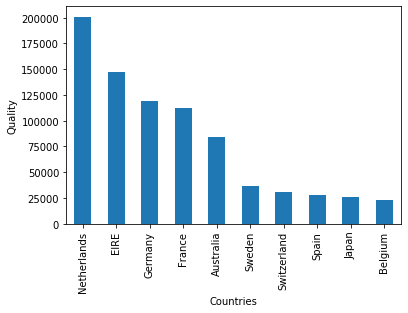

In [23]:
country =online_rt.groupby('Country').sum().sort_values(by = 'Quantity',ascending = False)#[1:11]
#Plotting by filtering out UK
country['Quantity'][1:11].plot(kind='bar')
plt.xlabel("Countries")
plt.ylabel("Quality")
plt.show()

### Step 5.  Exclude negative Quatity entries

In [5]:
online_rt = online_rt[online_rt['Quantity'] > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

In [46]:
top_countries = country.reset_index()['Country'][:3].to_list()
top_countries

['United Kingdom', 'Netherlands', 'EIRE']

In [59]:
#customers[customers['Country'].isin(top_countries)]
#customers
#customers.index.get_level_values(1)
#customers[customers['Country'].isin(top_countries)]

customers[customers['Country'].isin (top_countries)]


,,Quantity,UnitPrice,Country
CustomerID,Country,,,
12759.0,Netherlands,902,305.47,Netherlands
12775.0,Netherlands,877,256.12,Netherlands
12778.0,Netherlands,825,175.47,Netherlands
12787.0,Netherlands,261,79.96,Netherlands
12789.0,Netherlands,4,91.85,Netherlands
12790.0,Netherlands,166,82.92,Netherlands
12791.0,Netherlands,97,16.85,Netherlands
12802.0,Netherlands,314,63.00,Netherlands
14016.0,EIRE,2125,635.88,EIRE


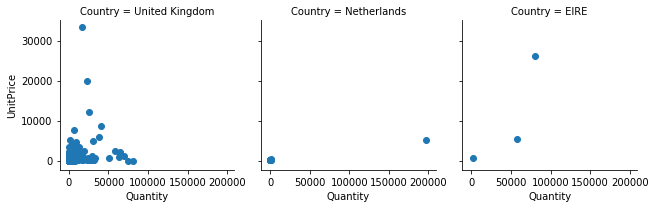

In [86]:
# groupby CustomerID,Country
customers = online_rt.groupby(['CustomerID','Country']).sum().reset_index()

# Remove any outlier with negative price
customers = customers[customers.UnitPrice > 0]

#get top 3 countries from country variable created earlier
top_countries = country.reset_index()['Country'][:3].to_list()

# filter customers based on top 3 countries
customers = customers[customers['Country'].isin (top_countries)]

#Graph
g = sns.FacetGrid(customers, col="Country")
g.map(plt.scatter, "Quantity", "UnitPrice")
g.add_legend()